# Lambda School Data Science - A First Look at Data



## Lecture - let's explore Python DS libraries and examples!

The Python Data Science ecosystem is huge. You've seen some of the big pieces - pandas, scikit-learn, matplotlib. What parts do you want to see more of?

In [280]:
!wget https://raw.githubusercontent.com/fivethirtyeight/data/master/alcohol-consumption/drinks.csv


--2019-07-11 00:55:53--  https://raw.githubusercontent.com/fivethirtyeight/data/master/alcohol-consumption/drinks.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4384 (4.3K) [text/plain]
Saving to: ‘drinks.csv.4’

drinks.csv.4        100%[===================>]   4.28K  --.-KB/s    in 0s      

2019-07-11 00:55:53 (64.8 MB/s) - ‘drinks.csv.4’ saved [4384/4384]



In [0]:
import pandas as pd

#Loading Data
## Loading Data
###Loading Data
####Loading Data

In [282]:
drinks = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/alcohol-consumption/drinks.csv')
drinks.shape

(193, 5)

In [283]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9


In [284]:
print(drinks.columns)
drinks.describe()

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol'],
      dtype='object')


,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


In [285]:
drinks.sort_values(by=['beer_servings'], ascending=False, )[:10]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
117,Namibia,376,3,1,6.8
45,Czech Republic,361,170,134,11.8
62,Gabon,347,98,59,8.9
65,Germany,346,117,175,11.3
98,Lithuania,343,244,56,12.9
135,Poland,343,215,56,10.9
188,Venezuela,333,100,3,7.7
81,Ireland,313,118,165,11.4
129,Palau,306,63,23,6.9
140,Romania,297,122,167,10.4


In [286]:
drinks.nlargest(10, 'spirit_servings')

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
68,Grenada,199,438,28,11.9
15,Belarus,142,373,42,14.4
73,Haiti,1,326,1,5.9
141,Russian Federation,247,326,73,11.5
144,St. Lucia,171,315,71,10.1
72,Guyana,93,302,1,7.1
155,Slovakia,196,293,116,11.4
50,Dominica,52,286,26,6.6
169,Thailand,99,258,1,6.4
40,Cook Islands,0,254,74,5.9


In [287]:
import numpy as np
#drinks['drinks_alcohol'] = drinks['total_litres_of_pure_alcohol'] >0
drinks['drinks_alcohol'] = np.where(drinks['total_litres_of_pure_alcohol'] >0, 'yes', 'no')
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,drinks_alcohol
0,Afghanistan,0,0,0,0.0,no
1,Albania,89,132,54,4.9,yes
2,Algeria,25,0,14,0.7,yes
3,Andorra,245,138,312,12.4,yes
4,Angola,217,57,45,5.9,yes


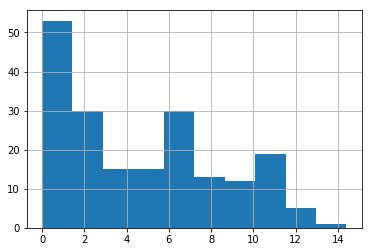

In [288]:
import matplotlib.pyplot as plt
%matplotlib inline

drinks['total_litres_of_pure_alcohol'].hist();

In [0]:
drinks['drinks_alcohol'] = np.where(drinks['total_litres_of_pure_alcohol'] >9, 
                                    'high',np.where(drinks['total_litres_of_pure_alcohol'] >=6, 
                                                    'medium',np.where(drinks['total_litres_of_pure_alcohol'] == 0,'none', 'low')))

In [290]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,drinks_alcohol
0,Afghanistan,0,0,0,0.0,none
1,Albania,89,132,54,4.9,low
2,Algeria,25,0,14,0.7,low
3,Andorra,245,138,312,12.4,high
4,Angola,217,57,45,5.9,low


In [291]:
drinks.drinks_alcohol.value_counts()

low       105
medium     41
high       34
none       13
Name: drinks_alcohol, dtype: int64

In [292]:
countries = pd.read_csv('https://raw.githubusercontent.com/lukes/ISO-3166-Countries-with-Regional-Codes/master/all/all.csv')
print(countries.shape)
countries.head()

(249, 11)


,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN


In [0]:
df = drinks.join(countries[['name', 'region', 'sub-region']], how='left')

In [294]:
df.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,drinks_alcohol,name,region,sub-region
0,Afghanistan,0,0,0,0.0,none,Afghanistan,Asia,Southern Asia
1,Albania,89,132,54,4.9,low,Åland Islands,Europe,Northern Europe
2,Algeria,25,0,14,0.7,low,Albania,Europe,Southern Europe
3,Andorra,245,138,312,12.4,high,Algeria,Africa,Northern Africa
4,Angola,217,57,45,5.9,low,American Samoa,Oceania,Polynesia


In [0]:
drinks.at[184, 'country'] = 'United States of America'

In [296]:
df = pd.merge(drinks, countries[['name', 'region', 'sub-region']], how='left', left_on='country', right_on='name')
df.head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,drinks_alcohol,name,region,sub-region
0,Afghanistan,0,0,0,0.0,none,Afghanistan,Asia,Southern Asia
1,Albania,89,132,54,4.9,low,Albania,Europe,Southern Europe
2,Algeria,25,0,14,0.7,low,Algeria,Africa,Northern Africa
3,Andorra,245,138,312,12.4,high,Andorra,Europe,Southern Europe
4,Angola,217,57,45,5.9,low,Angola,Africa,Sub-Saharan Africa
5,Antigua & Barbuda,102,128,45,4.9,low,NaN,NaN,NaN
6,Argentina,193,25,221,8.3,medium,Argentina,Americas,Latin America and the Caribbean
7,Armenia,21,179,11,3.8,low,Armenia,Asia,Western Asia
8,Australia,261,72,212,10.4,high,Australia,Oceania,Australia and New Zealand
9,Austria,279,75,191,9.7,high,Austria,Europe,Western Europe


In [297]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 0 to 192
Data columns (total 9 columns):
country                         193 non-null object
beer_servings                   193 non-null int64
spirit_servings                 193 non-null int64
wine_servings                   193 non-null int64
total_litres_of_pure_alcohol    193 non-null float64
drinks_alcohol                  193 non-null object
name                            168 non-null object
region                          168 non-null object
sub-region                      168 non-null object
dtypes: float64(1), int64(3), object(5)
memory usage: 15.1+ KB


In [298]:
df.isna().sum()

country                          0
beer_servings                    0
spirit_servings                  0
wine_servings                    0
total_litres_of_pure_alcohol     0
drinks_alcohol                   0
name                            25
region                          25
sub-region                      25
dtype: int64

In [299]:
df[df['region'].isna()]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,drinks_alcohol,name,region,sub-region
5,Antigua & Barbuda,102,128,45,4.9,low,NaN,NaN,NaN
20,Bolivia,167,41,8,3.8,low,NaN,NaN,NaN
21,Bosnia-Herzegovina,76,173,8,4.6,low,NaN,NaN,NaN
24,Brunei,31,2,1,0.6,low,NaN,NaN,NaN
28,Cote d'Ivoire,37,1,7,4.0,low,NaN,NaN,NaN
45,Czech Republic,361,170,134,11.8,high,NaN,NaN,NaN
46,North Korea,0,0,0,0.0,none,NaN,NaN,NaN
47,DR Congo,32,3,1,2.3,low,NaN,NaN,NaN
79,Iran,0,0,0,0.0,none,NaN,NaN,NaN
92,Laos,62,0,123,6.2,medium,NaN,NaN,NaN


In [300]:
drinks.iloc[184]

country                         United States of America
beer_servings                                        249
spirit_servings                                      158
wine_servings                                         84
total_litres_of_pure_alcohol                         8.7
drinks_alcohol                                    medium
Name: 184, dtype: object

In [0]:
#drinks['country'][184] = 'United States of America'

In [302]:
drinks['country'][184]

'United States of America'

In [303]:
drinks.iloc[184]

country                         United States of America
beer_servings                                        249
spirit_servings                                      158
wine_servings                                         84
total_litres_of_pure_alcohol                         8.7
drinks_alcohol                                    medium
Name: 184, dtype: object

In [304]:
df['sub-region'].value_counts()

Sub-Saharan Africa                 42
Latin America and the Caribbean    26
Western Asia                       16
Southern Europe                    12
Northern Europe                     9
Western Europe                      8
Southern Asia                       8
Eastern Europe                      8
South-eastern Asia                  8
Northern Africa                     6
Polynesia                           5
Central Asia                        5
Micronesia                          4
Melanesia                           4
Eastern Asia                        3
Northern America                    2
Australia and New Zealand           2
Name: sub-region, dtype: int64

In [305]:
df.groupby('region').beer_servings.mean()

region
Africa       62.645833
Americas    148.642857
Asia         33.000000
Europe      211.081081
Oceania      91.533333
Name: beer_servings, dtype: float64

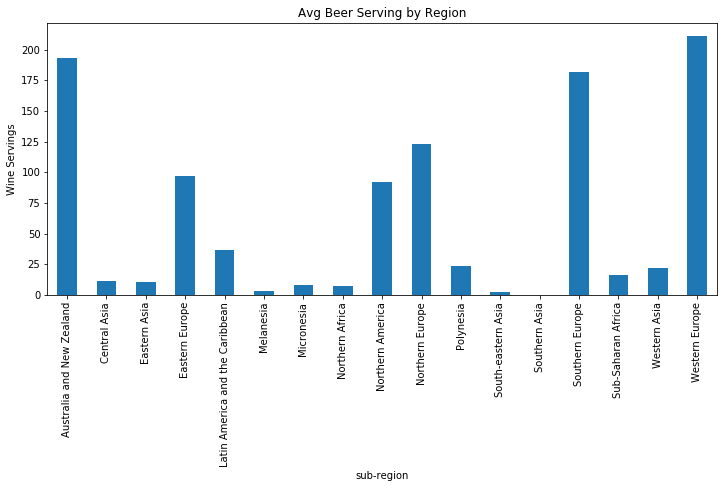

In [306]:
df.groupby('sub-region').wine_servings.mean().plot(kind='bar', figsize=(12,5))
plt.title('Avg Beer Serving by Region')
plt.ylabel('Wine Servings')
plt.show();


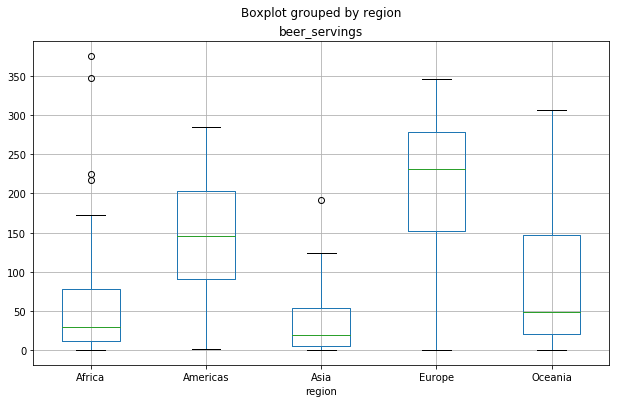

In [307]:
df.boxplot(column='beer_servings', by='region', figsize=(10,6));

In [0]:
import seaborn as sns

In [309]:
df = df.dropna(subset=['region'])
df.shape

(168, 9)

In [310]:
from bokeh.io import output_file, show, output_notebook
from bokeh.models import ColumnDataSource, HoverTool, CategoricalColorMapper
from bokeh.palettes import d3
from bokeh.plotting import figure
from bokeh.transform import transform
output_notebook()

x = df.beer_servings.values
y = df.wine_servings.values

country = df.country
region = df.region

source = ColumnDataSource(data=dict(x=x, y=y, country=country, region=region))
hover = HoverTool(tooltips=[
    ("index", "$index"),
    ("(x,y)", "(@x, @y)"),
    ('country', '@country'),
])
palette = d3['Category10'][len(df['region'].unique())]
mapper = CategoricalColorMapper(factors = df['region'].unique(), palette = palette)

# create figure and plot
p = figure(plot_width=600, plot_height=600, 
           tools=[hover, "wheel_zoom", "box_zoom", "reset"], 
           title="Beer and Wine Servings per Year by Country")

# create plot
p.scatter(x='x', y='y', size=10, alpha=0.8,
          color={'field': 'region', 'transform': mapper},
          legend='region', 
          source=source)

# add axis labels
p.xaxis.axis_label = "Beer Servings"
p.yaxis.axis_label = "Wine Servings"
output_file('interactive_bokeh_plot.html')
show(p)

Loading BokehJS ...

In [311]:
!ls

drinks.csv    drinks.csv.2  drinks.csv.4		 sample_data
drinks.csv.1  drinks.csv.3  interactive_bokeh_plot.html


## Assignment - now it's your turn

Pick at least one Python DS library, and using documentation/examples reproduce in this notebook something cool. It's OK if you don't fully understand it or get it 100% working, but do put in effort and look things up.

In [0]:
## data source: https://vincentarelbundock.github.io/Rdatasets/datasets.html
import pandas as pd

In [313]:
df = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/DAAG/nassCDS.csv') #Airbag and other influences on accident fatalities
df.shape

(26217, 16)

In [314]:
df.head(10)

,Unnamed: 0,dvcat,weight,dead,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,injSeverity,caseid
0,1,25-39,25.069,alive,none,belted,1,f,26,1997,1990.0,unavail,driver,0,3.0,2:3:1
1,2,10-24,25.069,alive,airbag,belted,1,f,72,1997,1995.0,deploy,driver,1,1.0,2:3:2
2,3,10-24,32.379,alive,none,none,1,f,69,1997,1988.0,unavail,driver,0,4.0,2:5:1
3,4,25-39,495.444,alive,airbag,belted,1,f,53,1997,1995.0,deploy,driver,1,1.0,2:10:1
4,5,25-39,25.069,alive,none,belted,1,f,32,1997,1988.0,unavail,driver,0,3.0,2:11:1
5,6,40-54,25.069,alive,none,belted,1,f,22,1997,1985.0,unavail,driver,0,3.0,2:11:2
6,7,55+,27.078,alive,none,belted,1,m,22,1997,1984.0,unavail,driver,0,3.0,2:13:1
7,8,55+,27.078,dead,none,none,1,m,32,1997,1987.0,unavail,driver,0,4.0,2:13:2
8,9,10-24,812.869,alive,none,belted,0,m,40,1997,1984.0,unavail,driver,0,1.0,2:14:1
9,10,10-24,812.869,alive,none,belted,1,f,18,1997,1987.0,unavail,driver,0,0.0,2:14:2


In [315]:
df.isna().sum()

Unnamed: 0       0
dvcat            0
weight           0
dead             0
airbag           0
seatbelt         0
frontal          0
sex              0
ageOFocc         0
yearacc          0
yearVeh          1
abcat            0
occRole          0
deploy           0
injSeverity    153
caseid           0
dtype: int64

In [316]:
#replace vehicle year nan vaule with yearVeh mean since there is only 1 nan
yearVeh_mean = df['yearVeh'].mean()

df['yearVeh'].fillna(yearVeh_mean, inplace=True)
df.isna().sum()

Unnamed: 0       0
dvcat            0
weight           0
dead             0
airbag           0
seatbelt         0
frontal          0
sex              0
ageOFocc         0
yearacc          0
yearVeh          0
abcat            0
occRole          0
deploy           0
injSeverity    153
caseid           0
dtype: int64

In [317]:
print(df['airbag'].value_counts())
print(df['seatbelt'].value_counts())

airbag    14419
none      11798
Name: airbag, dtype: int64
belted    18573
none       7644
Name: seatbelt, dtype: int64


In [0]:
#replace string in airbag column with true or false

df.replace({'airbag': {'none': False, 'airbag': True}},inplace=True)
df.replace({'seatbelt': {'none': False, 'belted': True}},inplace=True)

In [319]:
df.head(10)

,Unnamed: 0,dvcat,weight,dead,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,injSeverity,caseid
0,1,25-39,25.069,alive,False,True,1,f,26,1997,1990.0,unavail,driver,0,3.0,2:3:1
1,2,10-24,25.069,alive,True,True,1,f,72,1997,1995.0,deploy,driver,1,1.0,2:3:2
2,3,10-24,32.379,alive,False,False,1,f,69,1997,1988.0,unavail,driver,0,4.0,2:5:1
3,4,25-39,495.444,alive,True,True,1,f,53,1997,1995.0,deploy,driver,1,1.0,2:10:1
4,5,25-39,25.069,alive,False,True,1,f,32,1997,1988.0,unavail,driver,0,3.0,2:11:1
5,6,40-54,25.069,alive,False,True,1,f,22,1997,1985.0,unavail,driver,0,3.0,2:11:2
6,7,55+,27.078,alive,False,True,1,m,22,1997,1984.0,unavail,driver,0,3.0,2:13:1
7,8,55+,27.078,dead,False,False,1,m,32,1997,1987.0,unavail,driver,0,4.0,2:13:2
8,9,10-24,812.869,alive,False,True,0,m,40,1997,1984.0,unavail,driver,0,1.0,2:14:1
9,10,10-24,812.869,alive,False,True,1,f,18,1997,1987.0,unavail,driver,0,0.0,2:14:2


In [320]:
print(df['airbag'].value_counts())
print(df['seatbelt'].value_counts())
#
print(df['dead'].value_counts())

True     14419
False    11798
Name: airbag, dtype: int64
True     18573
False     7644
Name: seatbelt, dtype: int64
alive    25037
dead      1180
Name: dead, dtype: int64


In [321]:
#Not we will change the dead column to true and false aswell to make processing the data easier
## Note, If the person died, the value will be set to ture, and if the survived it will be set to false
df.replace({'dead': {'alive': False, 'dead': True}},inplace=True)
print(df['dead'].value_counts())
df.head()


False    25037
True      1180
Name: dead, dtype: int64


,Unnamed: 0,dvcat,weight,dead,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,injSeverity,caseid
0,1,25-39,25.069,False,False,True,1,f,26,1997,1990.0,unavail,driver,0,3.0,2:3:1
1,2,10-24,25.069,False,True,True,1,f,72,1997,1995.0,deploy,driver,1,1.0,2:3:2
2,3,10-24,32.379,False,False,False,1,f,69,1997,1988.0,unavail,driver,0,4.0,2:5:1
3,4,25-39,495.444,False,True,True,1,f,53,1997,1995.0,deploy,driver,1,1.0,2:10:1
4,5,25-39,25.069,False,False,True,1,f,32,1997,1988.0,unavail,driver,0,3.0,2:11:1


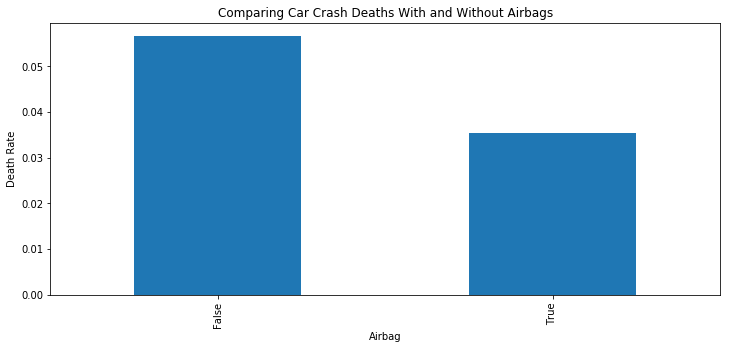

In [322]:

#alive with airbag vs alaive without airbag
df.groupby('airbag').dead.mean().plot(kind='bar', figsize=(12,5))
plt.title('Comparing Car Crash Deaths With and Without Airbags')
plt.xlabel('Airbag')
plt.ylabel('Death Rate')
plt.show();

In [0]:
import matplotlib.pyplot as plt
#Now we can visualize this data better with plt

In [324]:
#cleaning the inj severity column
df.injSeverity.describe()

count    26064.000000
mean         1.715508
std          1.293357
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: injSeverity, dtype: float64

In [0]:
#since there are only 153 nan in this column out of 26064, I am going to fill the nan values 
#with a random number in the range of 0 - 5
import random


df['injSeverity'].fillna(float(random.randrange(0,6)), inplace=True)

In [326]:
print(df['injSeverity'].isna().sum())
print(df.injSeverity.value_counts())

0
3.0    8495
0.0    6479
1.0    5595
2.0    4242
4.0    1118
5.0     286
6.0       2
Name: injSeverity, dtype: int64


In [327]:
df.dtypes

Unnamed: 0       int64
dvcat           object
weight         float64
dead              bool
airbag            bool
seatbelt          bool
frontal          int64
sex             object
ageOFocc         int64
yearacc          int64
yearVeh        float64
abcat           object
occRole         object
deploy           int64
injSeverity    float64
caseid          object
dtype: object

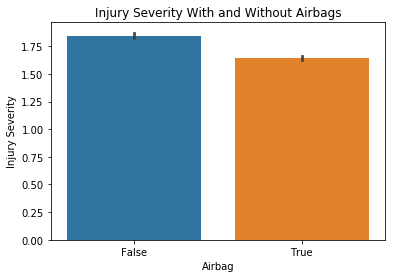

In [328]:
#bar graph comparing injury severity compared to having airbags
import seaborn as sns
sns.barplot(x=df.airbag, y=df.injSeverity)
plt.title('Injury Severity With and Without Airbags')
plt.xlabel('Airbag')
plt.ylabel('Injury Severity');

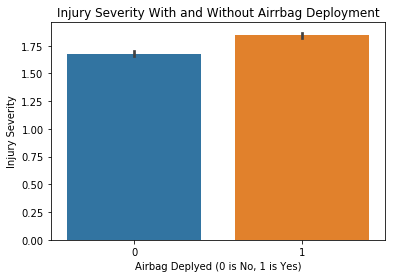

In [329]:
#This one will now show injsev compared to if the airbag deployed, the rresults are interesting
sns.barplot(x=df.deploy, y=df.injSeverity)
plt.title('Injury Severity With and Without Airrbag Deployment')
plt.xlabel("Airbag Deplyed (0 is No, 1 is Yes)")
plt.ylabel('Injury Severity');

###1) I chose a data set comparing cars that have airbags to cars that do not. The results that I got surprised me. To start I had to clean the data, and to do that, I first changed columns that had 'words' in them to something the computer can understand. In this case I used true and false values. I then needed to remove any data cell that contaned a NaN value. A NaN is really the lack of a value, meaning there is no data there. I was able to fill them since there were so few with either the average of that column or a random range. I then made a bar graph showing the injury serverity of crash victims with and without an airbag. I then did the same with airbag deployment. 
###2) The most challenging thiing for me was finding a good dataset. After trying many I settled on this, but I am still not happy with it. There are way to many true and false values so I felt like I could not do anything that interesting with the data.
###3) I learned that you will always get data you do not like working with, but you need to do it anyway. Being able to work with all types of data is something all data scientists need to learn how to do. I still need alot more practice, but I thing I was able to work with this dataset pretty well.
###4) I would like to find more datasets, and I would also like to drive deeper into the many differrent ways to visualize the data. Like the different graphs and such that libraries like Seaborn have to offer.  

### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  Describe in a paragraph of text what you did and why, as if you were writing an email to somebody interested but nontechnical.

2.  What was the most challenging part of what you did?

3.  What was the most interesting thing you learned?

4.  What area would you like to explore with more time?




## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub (and since this is the first assignment of the sprint, open a PR as well).

- [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/)
- [scikit-learn documentation](http://scikit-learn.org/stable/documentation.html)
- [matplotlib documentation](https://matplotlib.org/contents.html)
- [Awesome Data Science](https://github.com/bulutyazilim/awesome-datascience) - a list of many types of DS resources

Stretch goals:

- Find and read blogs, walkthroughs, and other examples of people working through cool things with data science - and share with your classmates!
- Write a blog post (Medium is a popular place to publish) introducing yourself as somebody learning data science, and talking about what you've learned already and what you're excited to learn more about.